In [ ]:
# This cell imports the drive library and mounts your Google Drive as a VM local drive. You can access to your Drive files 
# using this path "/content/gdrive/My Drive/"

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# !sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [ ]:
#!ls -la "/content/gdrive/My Drive/Colab Notebooks/Deep Learning/darknet_synthetic_dataset"

total 28
drwx------ 2 root root 4096 Sep 29 07:20 backup
drwx------ 2 root root 4096 Sep 29 07:20 bin
drwx------ 2 root root 4096 Sep 29 07:21 cfg
drwx------ 2 root root 4096 Sep 29 07:21 check
drwx------ 2 root root 4096 Sep 29 07:21 cuDNN
drwx------ 2 root root 4096 Sep 29 07:22 img
drwx------ 2 root root 4096 Sep 29 07:21 weights


## cuDNN and Darknet

In [ ]:
#!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# !cp /content/gdrive/My\ Drive/Colab\ Notebooks/Deep\ Learning/Darknet/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.solitairetheme8 gdrive/My\ Drive/Colab\ Notebooks/Deep\ Learning/Darknet/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz

In [ ]:
# unzipping the cuDNN files from the Drive folder directly to the VM CUDA folders
!tar -xzvf /content/gdrive/My\ Drive/Colab\ Notebooks/Deep\ Learning/Darknet/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
#import tarfile
#my_tar = tarfile.open("/content/gdrive/My Drive/Deep Learning/Darknet/cuddn/cudnn-10.0-linux-x64-v7.5.0.56.tgz")
#my_tar.extractall('./') # specify which folder to extract to

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a


In [ ]:
#to change access permissions to read
!chmod a+r /usr/local/cuda/include/cudnn.h

In [ ]:
# checking the version of cuDNN installed on VM. Can comment this line on future runs
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [ ]:
# Leave this code uncommented on the very first run of your notebook or if you ever need to recompile darknet again.
# Comment this code on the future runs.
!git clone https://github.com/kriyeng/darknet/
%cd darknet

# Check the folder
!ls


!git checkout feature/google-colab

#Compile Darknet
!make

#Copies the Darknet compiled version to Google drive
# !cp -r /content/darknet /content/gdrive/My\ Drive/Colab\ Notebooks/Deep\ Learning/Darknet/bin/

Cloning into 'darknet'...
remote: Enumerating objects: 10068, done.
remote: Total 10068 (delta 0), reused 0 (delta 0), pack-reused 10068
Receiving objects: 100% (10068/10068), 10.13 MiB | 23.89 MiB/s, done.
Resolving deltas: 100% (6742/6742), done.
/content/darknet
3rdparty      CMakeLists.txt	      image_yolov3.sh	     scripts
appveyor.yml  CMakeSettings.json      include		     src
build	      DarknetConfig.cmake.in  json_mjpeg_streams.sh  video_v2.sh
build.ps1     darknet.py	      LICENSE		     video_yolov3.sh
build.sh      darknet_video.py	      Makefile
cfg	      data		      net_cam_v3.sh
cmake	      image_yolov2.sh	      README.md
Branch 'feature/google-colab' set up to track remote branch 'feature/google-colab' from 'origin'.
Switched to a new branch 'feature/google-colab'
mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -

In [ ]:
# !ls

3rdparty      CMakeLists.txt	      image_yolov3.sh	     results
appveyor.yml  CMakeSettings.json      include		     scripts
backup	      darknet		      json_mjpeg_streams.sh  src
build	      DarknetConfig.cmake.in  LICENSE		     video_v2.sh
build.ps1     darknet.py	      Makefile		     video_yolov3.sh
build.sh      darknet_video.py	      net_cam_v3.sh
cfg	      data		      obj
cmake	      image_yolov2.sh	      README.md


In [ ]:
# Uncomment after the first run, when you have a copy of compiled darkent in your Google Drive

# Makes a dir for darknet and move there
#!mkdir darknet
#%cd darknet

# Copy the Darkent compiled version to the VM local drive
# !cp -r /content/gdrive/My\ Drive/Colab\ Notebooks/Deep\ Learning/Darknet/bin/darknet /content/

# Set execution permissions to Darknet
#!chmod +x /content/darknet

In [ ]:
#%cd darknet (to give execution permissions)
!chmod +x darknet

In [ ]:
#!tree /content/Darknet

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

def imShow(path):

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()                                   # gcf = get current figure
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
''' 
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

def download(path):
  from google.colab import files
  files.download(path)
'''

" \ndef upload():\n  from google.colab import files\n  uploaded = files.upload() \n  for name, data in uploaded.items():\n    with open(name, 'wb') as f:\n      f.write(data)\n      print ('saved file', name)\n\ndef download(path):\n  from google.colab import files\n  files.download(path)\n"

In [ ]:
# Not necessary cell
# Get yolov3 weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-11-28 14:06:59--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   711KB/s    in 6m 2s   

2020-11-28 14:13:02 (669 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

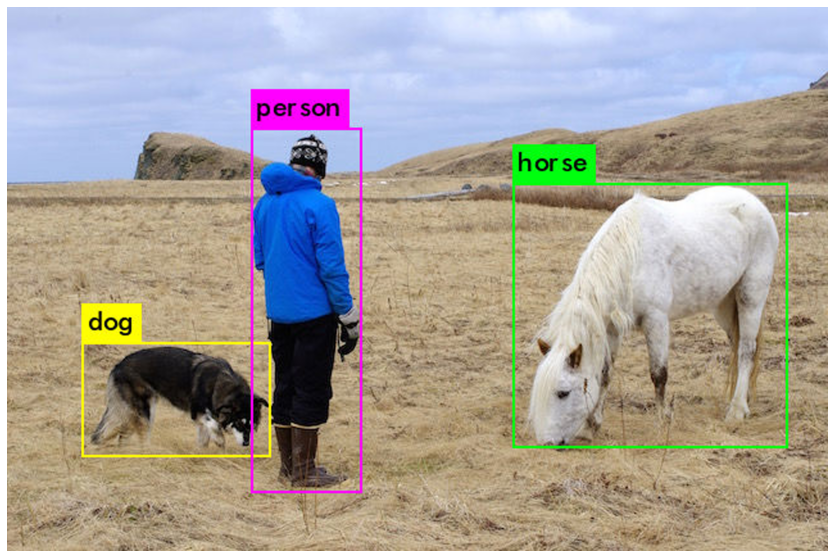

In [ ]:
# Not necessary cell
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg -dont-show

# Show the result using the helper imgShow()
imShow('predictions.jpg')

In [ ]:
# don't go beyond here with Run All
#assert False

## Preparing data and configuration files


### modify: train.txt, test.txt, txt files in img folder

In [ ]:
import pandas as pd
import numpy as np
import cv2
from natsort import natsorted
import os
import matplotlib.pyplot as plt

### Load the dataset into session

In [ ]:
# i will load the dataset 
%cd /content/darknet/data     

/content/darknet/data


In [ ]:
#!tar -xvzf gdrive/My\ Drive/Deep\ Learning/Synthetic_Dataset_Hindi_images_Yolo1.tar 

tar (child): gdrive/My Drive/Deep Learning/Synthetic_Dataset_Hindi_images_Yolo.tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [ ]:
import tarfile
my_tar = tarfile.open("/content/gdrive/My Drive/Colab Notebooks/Deep Learning/Synthetic_Dataset_Hindi_Yolo.tar")
my_tar.extractall('./')


In [ ]:
#rename directory name
os.rename("Images","obj")

In [ ]:
%cd obj

/content/darknet/data/obj


In [ ]:
!ls

Streaming output truncated to the last 5000 lines.
112682.txt  23095.jpg	38026.txt  52959.jpg  67890.txt  82821.jpg  97753.txt
112683.jpg  23095.txt	38027.jpg  52959.txt  67891.jpg  82821.txt  97754.jpg
112683.txt  23096.jpg	38027.txt  5295.jpg   67891.txt  82822.jpg  97754.txt
112684.jpg  23096.txt	38028.jpg  5295.txt   67892.jpg  82822.txt  97755.jpg
112684.txt  23097.jpg	38028.txt  52960.jpg  67892.txt  82823.jpg  97755.txt
112685.jpg  23097.txt	38029.jpg  52960.txt  67893.jpg  82823.txt  97756.jpg
112685.txt  23098.jpg	38029.txt  52961.jpg  67893.txt  82824.jpg  97756.txt
112686.jpg  23098.txt	3802.jpg   52961.txt  67894.jpg  82824.txt  97757.jpg
112686.txt  23099.jpg	3802.txt   52962.jpg  67894.txt  82825.jpg  97757.txt
112687.jpg  23099.txt	38030.jpg  52962.txt  67895.jpg  82825.txt  97758.jpg
112687.txt  2309.jpg	38030.txt  52963.jpg  67895.txt  82826.jpg  97758.txt
112688.jpg  2309.txt	38031.jpg  52963.txt  67896.jpg  82826.txt  97759.jpg
112688.txt  230.jpg	38031.txt  52964.jp

### Load cfg and weights file

In [ ]:
%cd /content/darknet/

/content/darknet


In [ ]:
!cp /content/gdrive/My\ Drive/Colab\ Notebooks/Deep\ Learning/Darknet/bin/darknet/yolo-obj.cfg /content/darknet

In [ ]:
!cp /content/gdrive/My\ Drive/Colab\ Notebooks/Deep\ Learning/Darknet/bin/darknet/darknet53.conv.74 /content/darknet

### save image paths in train.txt and test.txt
Make obj.names, obj.data


In [ ]:
%cd /content/darknet/data/

/content/darknet/data


In [ ]:
a = list(range(0,10))
b = map(str, a) 
print(a)
print(b)
list(b)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
# train.txt path
total = 116132 #no. of files
train_list = list(map(str,list(range(0,total))))
print(len(train_list))
print(train_list[-1])

test_list = train_list[19::20]
print(len(test_list))

del train_list[19::20]
print(len(train_list))
print(train_list[:50])

116132
116131
5806
110326
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51']


In [ ]:
with open('train.txt', 'w+') as filehandle:
    filehandle.writelines("data/obj/%s.jpg\n" % image for image in train_list)

In [ ]:
with open('test.txt', 'w+') as filehandle:
    filehandle.writelines("data/obj/%s.jpg\n" % image for image in test_list)

In [ ]:
# obj.names
with open("obj.names",'w+') as filehandle:
    filehandle.writelines("HINDI\n")

In [ ]:
# obj.data
data_list = ["classes = 1", "train = data/train.txt", "valid = data/test.txt", "names = data/obj.names", "backup = backup/"]

with open("obj.data","w+") as filehandle:
    filehandle.writelines("%s\n" % data for data in data_list)

### Yolo format (Do only once)
save folder to google drive

In [ ]:
%cd /content/

/content


In [ ]:
!unzip "/content/gdrive/My Drive/Deep Learning/Synthetic_Dataset_(Hindi).zip"

unzip:  cannot find or open /content/gdrive/My Drive/Deep Learning/Synthetic_Dataset_(Hindi).zip, /content/gdrive/My Drive/Deep Learning/Synthetic_Dataset_(Hindi).zip.zip or /content/gdrive/My Drive/Deep Learning/Synthetic_Dataset_(Hindi).zip.ZIP.


In [ ]:
import os
from natsort import natsorted
import pandas as pd

In [ ]:
import cv2

In [ ]:
# txt files of train images
train_list =  natsorted(os.listdir("Synthetic_Dataset_(Hindi)/Annotations/Train"))
print(train_list)
print(len(train_list))

In [ ]:
'''
header_names = ["x1","x2","x3","x4","y1","y2","y3","y4","Text"]
i = "5.txt"
file_name = "/content/Synthetic_Dataset_(Hindi)/Annotations/Train/"+ i 
df = pd.read_csv(file_name,header= None,names=header_names,sep = " ")

min_y = df[["y1", "y2", "y3", "y4"]].min(axis=1)
max_y = df[["y1", "y2", "y3", "y4"]].max(axis=1)
min_x = df[["x1", "x2", "x3", "x4"]].min(axis=1)
max_x = df[["x1", "x2", "x3", "x4"]].max(axis=1)
bh = max_y - min_y #bounding box height 
bw = max_x - min_x #bounding box width
xc = min_x + bw/2 #x_center
yc = min_y + bh/2 #y_center

#read the image
img_dim = cv2.imread("/content/Synthetic_Dataset_(Hindi)/Images/Train/"+i[:-4]+".jpg").shape[:2]
#print(img_dim)

#Relative position
xc = xc/img_dim[1]
yc = yc/img_dim[0]
bh = bh/img_dim[0]
bw = bw/img_dim[1]

df["x_center"] = xc
df["y_center"] = yc
df["width"] = bw
df["height"] = bh
df["class"] = 0
df = df[["class","x_center","y_center","width","height"]]
df.to_csv("/content/Synthetic_Dataset_(Hindi)/Images/"+ i,index=False,sep =' ', header=False)
df
'''

,class,x_center,y_center,width,height
0,0,0.031853,0.145816,0.045515,0.047232
1,0,0.127004,0.268922,0.153269,0.139305
2,0,0.499681,0.338805,0.093974,0.117579
3,0,0.890320,0.134102,0.125364,0.205098


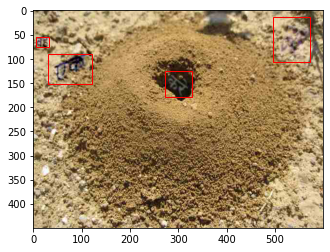

In [ ]:
'''
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
i = "5.txt"
im = np.array(Image.open("/content/Synthetic_Dataset_(Hindi)/Images/Train/"+i[:-4]+".jpg"), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
wi = df["width"]*600
hi = df["height"]*450
x = df["x_center"]*600 - wi/2
y = df["y_center"]*450 - hi/2
for i in range(len(wi)):
    rect = patches.Rectangle((x[i],y[i]),wi[i],hi[i],linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()
'''

In [ ]:
header_names = ["x1","x2","x3","x4","y1","y2","y3","y4","Text"]

for i in train_list:
    print(i)
    file_name = "/content/Synthetic_Dataset_(Hindi)/Annotations/Train/"+ i 
    df = pd.read_csv(file_name,header= None,names=header_names,sep = " ")   # reading ith annotation file. header = none is done so that the first line of the file 
                                                                            # should not be considered as the header. names=header_names is done so that header is header_names.

    min_y = df[["y1", "y2", "y3", "y4"]].min(axis=1)                        # axis = 1 is done because we want values across columns
    max_y = df[["y1", "y2", "y3", "y4"]].max(axis=1)
    min_x = df[["x1", "x2", "x3", "x4"]].min(axis=1)
    max_x = df[["x1", "x2", "x3", "x4"]].max(axis=1)
    bh = max_y - min_y #bounding box height 
    bw = max_x - min_x #bounding box width
    xc = min_x + bw/2 #x_center
    yc = min_y + bh/2 #y_center

    #read the image
    img_dim = cv2.imread("/content/Synthetic_Dataset_(Hindi)/Images/Train/"+i[:-4]+".jpg").shape[:2]    # i[:-4] is done to truncate .txt from i.txt.  shape[:2] means taking only
                                                                                                        # first 2 dimensions
    #print(img_dim)

    #Relative position
    xc = xc/img_dim[1]
    yc = yc/img_dim[0]
    bh = bh/img_dim[0]
    bw = bw/img_dim[1]

    df["x_center"] = xc   # Adding a column (x_center) to df
    df["y_center"] = yc
    df["width"] = bw
    df["height"] = bh
    df["class"] = 0
    df = df[["class","x_center","y_center","width","height"]]
    df.to_csv("/content/Synthetic_Dataset_(Hindi)/Images/"+ i,index=False,sep =' ', header=False)     # overwriting ith txt file. index=False is done so that index is not written

In [ ]:
'''
i = "19.txt"
file_name = "/content/Synthetic_Dataset_(Hindi)/Annotations/Val/"+ i 
df = pd.read_csv(file_name,header= None,names=header_names,sep = " ")

min_y = df[["y1", "y2", "y3", "y4"]].min(axis=1)
max_y = df[["y1", "y2", "y3", "y4"]].max(axis=1)
min_x = df[["x1", "x2", "x3", "x4"]].min(axis=1)
max_x = df[["x1", "x2", "x3", "x4"]].max(axis=1)
bh = max_y - min_y #bounding box height 
bw = max_x - min_x #bounding box width
xc = min_x + bw/2 #x_center
yc = min_y + bh/2 #y_center

#read the image
img_dim = cv2.imread("/content/Synthetic_Dataset_(Hindi)/Images/Val/"+i[:-4]+".jpg").shape[:2]
#print(img_dim)

#Relative position
xc = xc/img_dim[1]
yc = yc/img_dim[0]
bh = bh/img_dim[0]
bw = bw/img_dim[1]

df["x_center"] = xc
df["y_center"] = yc
df["width"] = bw
df["height"] = bh
df["class"] = 0
df = df[["class","x_center","y_center","width","height"]]
df.to_csv("/content/Synthetic_Dataset_(Hindi)/Images/"+ i,index=False,sep =' ', header=False)
df
'''

,class,x_center,y_center,width,height
0,0,0.032812,0.150361,0.047115,0.033823
1,0,0.246864,0.717710,0.475584,0.544883
2,0,0.047936,0.277367,0.104320,0.101525
3,0,0.895639,0.146424,0.117526,0.187060
4,0,0.490019,0.350243,0.092683,0.103521
5,0,0.691607,0.412769,0.223293,0.183460
6,0,0.675874,0.646667,0.205651,0.162704
7,0,0.122133,0.212596,0.096710,0.090966
8,0,0.113260,0.285880,0.082219,0.086515
9,0,0.407676,0.557482,0.101897,0.101740


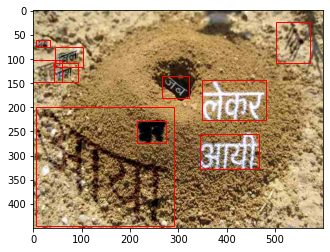

In [ ]:
'''
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
i = "19.txt"
im = np.array(Image.open("/content/Synthetic_Dataset_(Hindi)/Images/Val/"+i[:-4]+".jpg"), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
wi = df["width"]*img_dim[1]
hi = df["height"]*img_dim[0]
x = df["x_center"]*img_dim[1] - wi/2
y = df["y_center"]*img_dim[0] - hi/2
for i in range(len(wi)):
    rect = patches.Rectangle((x[i],y[i]),wi[i],hi[i],linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()
'''

In [ ]:
# txt files of test images

test_list =  natsorted(os.listdir("Synthetic_Dataset_(Hindi)/Annotations/Val"))
print(test_list)
print(len(test_list))

header_names = ["x1","x2","x3","x4","y1","y2","y3","y4","Text"]

for i in test_list:
    print(i)
    file_name = "/content/Synthetic_Dataset_(Hindi)/Annotations/Val/"+ i 
    df = pd.read_csv(file_name,header= None,names=header_names,sep = " ")

    min_y = df[["y1", "y2", "y3", "y4"]].min(axis=1)
    max_y = df[["y1", "y2", "y3", "y4"]].max(axis=1)
    min_x = df[["x1", "x2", "x3", "x4"]].min(axis=1)
    max_x = df[["x1", "x2", "x3", "x4"]].max(axis=1)
    bh = max_y - min_y #bounding box height 
    bw = max_x - min_x #bounding box width
    xc = min_x + bw/2 #x_center
    yc = min_y + bh/2 #y_center

    #read the image
    img_dim = cv2.imread("/content/Synthetic_Dataset_(Hindi)/Images/Val/"+i[:-4]+".jpg").shape[:2]
    #print(img_dim)

    #Relative position
    xc = xc/img_dim[1]
    yc = yc/img_dim[0]
    bh = bh/img_dim[0]
    bw = bw/img_dim[1]

    df["x_center"] = xc
    df["y_center"] = yc
    df["width"] = bw
    df["height"] = bh
    df["class"] = 0
    df = df[["class","x_center","y_center","width","height"]]
    df.to_csv("/content/Synthetic_Dataset_(Hindi)/Images/"+ i,index=False,sep =' ', header=False)

In [ ]:
# move all images
dir = "/content/Synthetic_Dataset_(Hindi)/Images/"
for i in train_list:
    os.rename(dir+"Train/"+i[:-4]+".jpg",dir+i[:-4]+".jpg")

for i in test_list:
    os.rename(dir+"Val/"+i[:-4]+".jpg",dir+i[:-4]+".jpg")



In [ ]:
%cd /content/Synthetic_Dataset_(Hindi)/Images

/content/Synthetic_Dataset_(Hindi)/Images


In [ ]:
!rm -d Train  # remove directory
!rm -d Val

In [ ]:
len(os.listdir())/2

116132.0

In [ ]:
%cd /content/Synthetic_Dataset_\(Hindi\)

/content/Synthetic_Dataset_(Hindi)


In [ ]:
# Zip the image folder
#!zip -r /content/gdrive/My\ Drive/Colab\ Notebooks/Deep\ Learning/Synthetic_Dataset_Hindi_Yolo.zip ./Images

!tar -cvzf /content/gdrive/My\ Drive/Colab\ Notebooks/Deep\ Learning/Synthetic_Dataset_Hindi_Yolo.tar ./Images

### Visualisation

In [ ]:
# Visualization

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import pandas as pd

In [ ]:
total = 116132 #no. of files
train_list = list(map(str,list(range(0,total))))

test_list = train_list[19::20]
index = 0

In [ ]:
img_file = test_list[index] + ".jpg"
im = np.array(Image.open("/content/darknet/data/obj/" + img_file), dtype=np.uint8)
im_dim = im.shape[:2]
im_dim

(450, 600)

In [ ]:
#Read the results file and the actual annotations
header_names = ["class_id","x_center","y_center","width","height"]
true_ann = pd.read_csv("/content/darknet/data/obj/" + test_list[index] + ".txt", sep = " ",header = None,names = header_names)
true_ann

,class_id,x_center,y_center,width,height
0,0,0.032812,0.150361,0.047115,0.033823
1,0,0.246864,0.717710,0.475584,0.544883
2,0,0.047936,0.277367,0.104320,0.101525
3,0,0.895639,0.146424,0.117526,0.187060
4,0,0.490019,0.350243,0.092683,0.103521
5,0,0.691607,0.412769,0.223293,0.183460
6,0,0.675874,0.646667,0.205651,0.162704
7,0,0.122133,0.212596,0.096710,0.090966
8,0,0.113260,0.285880,0.082219,0.086515
9,0,0.407676,0.557482,0.101897,0.101740


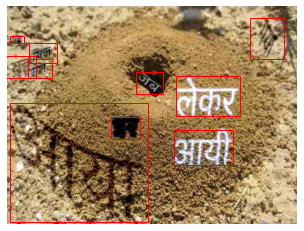

In [ ]:
# Create figure and axes
fig,ax = plt.subplots(1)
plt.axis('off')
# Display the image
ax.imshow(im)

# Create a Rectangle patch
wi = true_ann["width"]*im_dim[1]
hi = true_ann["height"]*im_dim[0]
x = true_ann["x_center"]*im_dim[1] - wi/2
y = true_ann["y_center"]*im_dim[0] - hi/2
for i in range(len(wi)):
    rect = patches.Rectangle((x[i],y[i]),wi[i],hi[i],linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

# Training

In [ ]:
%cd /content/darknet


/content/darknet


In [ ]:
!sudo apt-get install dos2unix
!dos2unix /content/darknet/data/train.txt
!dos2unix /content/darknet/data/test.txt
!dos2unix /content/darknet/data/obj.names
!dos2unix /content/darknet/data/obj.data

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 351 kB of archives.
After this operation, 1,267 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dos2unix amd64 7.3.4-3 [351 kB]
Fetched 351 kB in 2s (214 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package dos2unix.
(Reading database ... 146364 files and directories curren

In [ ]:
! ./darknet detector train "data/obj.data" "yolo-obj.cfg" "darknet53.conv.74" -dont_show


Streaming output truncated to the last 5000 lines.
Loaded: 0.000035 seconds

 3548: 0.918037, 1.141576 avg loss, 0.010000 rate, 3.555975 seconds, 227072 images
Loaded: 0.000043 seconds

 3549: 1.024657, 1.129884 avg loss, 0.010000 rate, 3.544720 seconds, 227136 images
Loaded: 0.000113 seconds

 3550: 1.143597, 1.131256 avg loss, 0.010000 rate, 3.558690 seconds, 227200 images
Resizing
480 x 480 
 try to allocate additional workspace_size = 66.36 MB 
 CUDA allocate done! 
Loaded: 0.164384 seconds

 3551: 0.983822, 1.116512 avg loss, 0.010000 rate, 3.490042 seconds, 227264 images
Loaded: 0.000049 seconds

 3552: 0.997220, 1.104583 avg loss, 0.010000 rate, 3.538753 seconds, 227328 images
Loaded: 0.000047 seconds

 3553: 1.144485, 1.108573 avg loss, 0.010000 rate, 3.568716 seconds, 227392 images
Loaded: 0.000037 seconds

 3554: 1.030247, 1.100741 avg loss, 0.010000 rate, 3.551708 seconds, 227456 images
Loaded: 0.000042 seconds

 3555: 1.091530, 1.099820 avg loss, 0.010000 rate, 3.570199 sec

In [ ]:
# !cp backup/yolo-obj_last.weights ./

In [ ]:
!cp /content/gdrive/My\ Drive/Colab\ Notebooks/Deep\ Learning/Darknet/bin/darknet/backup/yolo-obj_5000.weights /content/darknet/backup   # to be done only after training

In [ ]:
! ./darknet detector train "data/obj.data" "yolo-obj.cfg" "backup/yolo-obj_5000.weights" -dont_show 

yolo-obj
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 

In [ ]:
# !cp backup/yolo_ ./

/content/darknet/data/obj


In [ ]:
! ./darknet detector test data/obj.data yolo-obj.cfg backup/yolo-obj_5000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

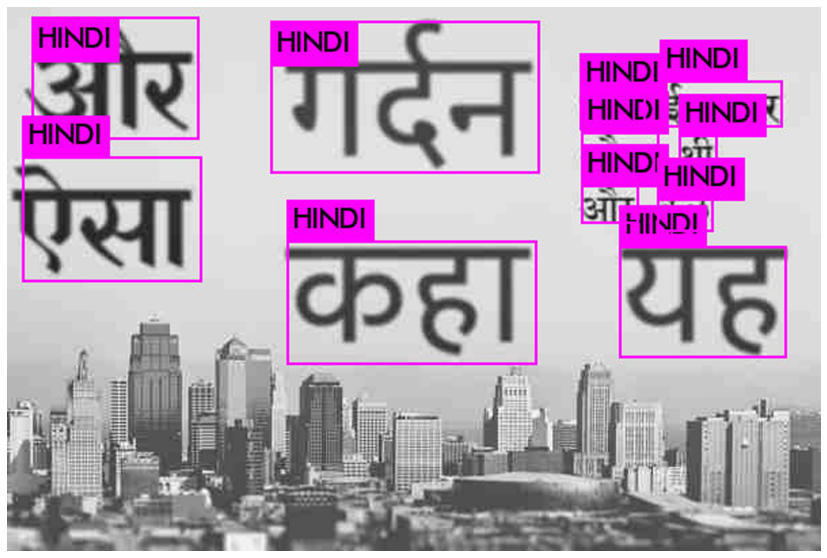

In [ ]:
imShow("predictions.jpg")

In [ ]:
! ./darknet detector map data/obj.data yolo-obj.cfg backup/yolo-obj_5000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [ ]:
! ./darknet detector test data/obj.data yolo-obj.cfg backup/yolo-obj_5000.weights -ext_output data/obj/60139.jpg

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

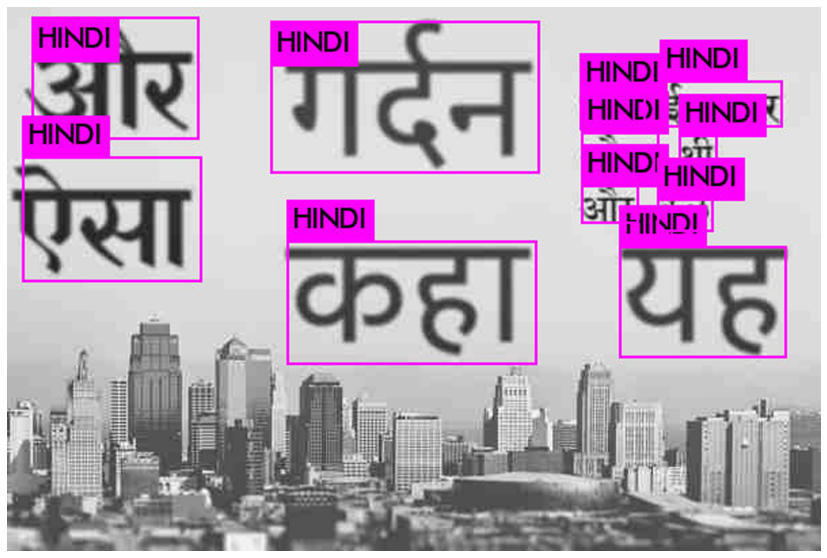

In [ ]:
imShow("predictions.jpg")

In [ ]:
! ./darknet detector test data/obj.data yolo-obj.cfg backup/yolo-obj_5000.weights -dont_show -ext_output <data/test.txt> result.txt

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

# Croping Image

In [ ]:
res = open("result.txt", "r")

In [ ]:
res.seek(0)
res_list = (res.readlines())
res_list = [x.strip() for x in res_list]
res_list

['',
 'seen 64',
 'Enter Image Path: data/obj/19.jpg: Predicted in 17.525000 milli-seconds.',
 'HINDI: 47%\t(left_x:    5   top_y:  102   width:   46   height:   56)',
 'HINDI: 59%\t(left_x:   36   top_y:  205   width:  244   height:  241)',
 'HINDI: 88%\t(left_x:   43   top_y:  117   width:   44   height:   30)',
 'HINDI: 96%\t(left_x:   46   top_y:   83   width:   53   height:   30)',
 'HINDI: 47%\t(left_x:  212   top_y:  230   width:   67   height:   43)',
 'HINDI: 94%\t(left_x:  268   top_y:  133   width:   55   height:   50)',
 'HINDI: 99%\t(left_x:  345   top_y:  248   width:  129   height:   83)',
 'HINDI: 100%\t(left_x:  348   top_y:  140   width:  132   height:   93)',
 'HINDI: 54%\t(left_x:  491   top_y:   -9   width:   91   height:  136)',
 'HINDI: 25%\t(left_x:  538   top_y:   45   width:   63   height:  132)',
 'Enter Image Path: data/obj/39.jpg: Predicted in 17.278000 milli-seconds.',
 'HINDI: 85%\t(left_x:    5   top_y:  126   width:   72   height:   55)',
 'HINDI: 68%\t

In [ ]:
total = 116132 
train_list = list(map(str, list(range(0, total))))
test_list = train_list[19::20]
index = 1
img = "data/obj/60139.jpg"
img_next = "data/obj/60159.jpg"
start = [res_list.index(s) for s in res_list if img in s]
end = [res_list.index(s) for s in res_list if img_next in s]
res_list[start[0]+1:end[0]]

['HINDI: 100%\t(left_x:   12   top_y:  110   width:  132   height:   92)',
 'HINDI: 100%\t(left_x:   18   top_y:    8   width:  123   height:   90)',
 'HINDI: 99%\t(left_x:  194   top_y:   10   width:  198   height:  112)',
 'HINDI: 100%\t(left_x:  206   top_y:  172   width:  184   height:   91)',
 'HINDI: 100%\t(left_x:  423   top_y:   65   width:   48   height:   26)',
 'HINDI: 96%\t(left_x:  423   top_y:   93   width:   58   height:   32)',
 'HINDI: 98%\t(left_x:  423   top_y:  131   width:   42   height:   29)',
 'HINDI: 98%\t(left_x:  451   top_y:  177   width:  123   height:   81)',
 'HINDI: 100%\t(left_x:  479   top_y:  141   width:   41   height:   24)',
 'HINDI: 100%\t(left_x:  482   top_y:   55   width:   90   height:   33)',
 'HINDI: 92%\t(left_x:  495   top_y:   94   width:   28   height:   26)']

In [ ]:
res_img = res_list[start[0]+1:end[0]]
res_img = [x.split(sep = "\t")[-1] for x in res_img]
res_img

['(left_x:   12   top_y:  110   width:  132   height:   92)',
 '(left_x:   18   top_y:    8   width:  123   height:   90)',
 '(left_x:  194   top_y:   10   width:  198   height:  112)',
 '(left_x:  206   top_y:  172   width:  184   height:   91)',
 '(left_x:  423   top_y:   65   width:   48   height:   26)',
 '(left_x:  423   top_y:   93   width:   58   height:   32)',
 '(left_x:  423   top_y:  131   width:   42   height:   29)',
 '(left_x:  451   top_y:  177   width:  123   height:   81)',
 '(left_x:  479   top_y:  141   width:   41   height:   24)',
 '(left_x:  482   top_y:   55   width:   90   height:   33)',
 '(left_x:  495   top_y:   94   width:   28   height:   26)']

In [ ]:
res_img = [x.split()[1:8:2] for x in res_img]
res_img

[['12', '110', '132', '92)'],
 ['18', '8', '123', '90)'],
 ['194', '10', '198', '112)'],
 ['206', '172', '184', '91)'],
 ['423', '65', '48', '26)'],
 ['423', '93', '58', '32)'],
 ['423', '131', '42', '29)'],
 ['451', '177', '123', '81)'],
 ['479', '141', '41', '24)'],
 ['482', '55', '90', '33)'],
 ['495', '94', '28', '26)']]

In [ ]:
i = 0
for x in res_img:
    res_img[i][-1] = res_img[i][-1][:-1]
    i = i+1
res_img = pd.DataFrame(res_img, columns = ["left_x", "top_y", "width", "height"])
res_img = res_img.apply(pd.to_numeric)
res_img

,left_x,top_y,width,height
0,12,110,132,92
1,18,8,123,90
2,194,10,198,112
3,206,172,184,91
4,423,65,48,26
5,423,93,58,32
6,423,131,42,29
7,451,177,123,81
8,479,141,41,24
9,482,55,90,33


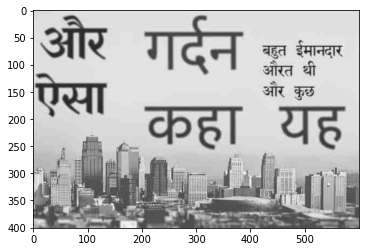

(401, 600, 3)

In [ ]:
Img = cv2.imread('data/obj/60139.jpg')
newImg = cv2.cvtColor(Img,cv2.COLOR_BGR2RGB)
plt.imshow(newImg)
plt.show()
Img.shape

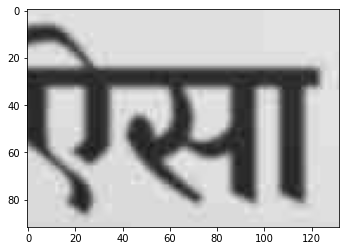

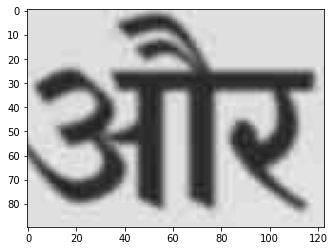

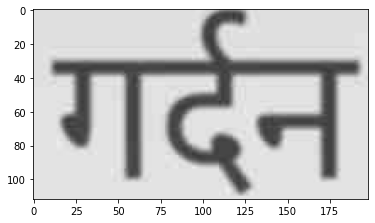

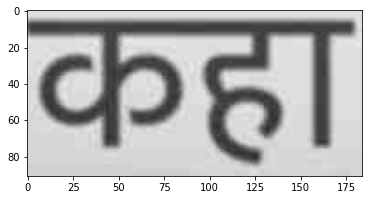

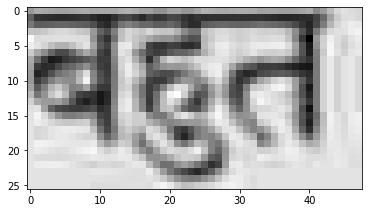

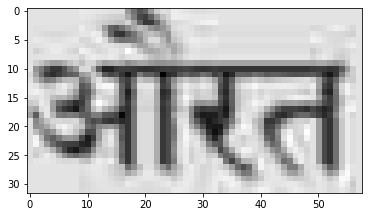

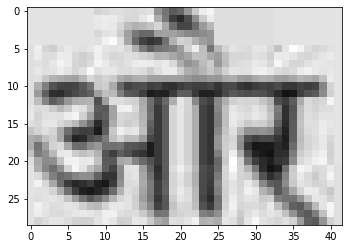

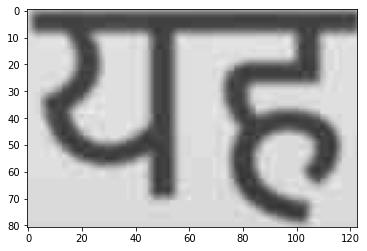

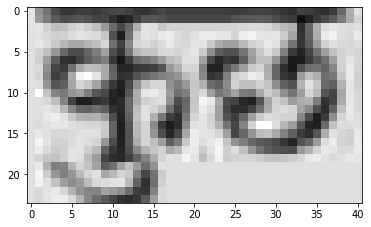

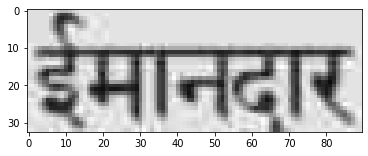

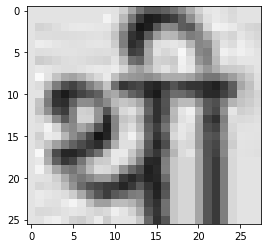

In [ ]:
for j in res_img.index:
    crop_img = newImg[max(int(res_img["top_y"][j]),0):max(int(res_img["top_y"][j]),0)+res_img["height"][j], max(int(res_img["left_x"][j]),0):max(int(res_img["left_x"][j]),0)+res_img["width"][j]]
    filename = "cropped.jpg"
    #cv2.imwrite(filename, crop_img)
    plt.imshow(crop_img)
    plt.show()


In [ ]:
from sklearn implort MLPClassifier
model = MLPClassifier()
model.predict("")